# PERCEPTRON example 

Example extracted from https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

This code illustrates the bahaviour of the perceptron using as many inputs as coordinates in 
an input sample (row), on a binary classification problem. The output decision function is the 
Heaviside step function. 


## define a single neuron, with Heaviside step activation function 

" Predict" function computes 
$$ {\rm activation} = \sum_{k=0}^{len(row)} w_k.row(k) $$
where  $w[0]={\rm bias}$, and $w[k]_{k=1,len(row)}$ are the neuron inputs.  

In [22]:
# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0
 
# test predictions on an example (here 2 inputs + bias)
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
weights = [-0.1, 0.20653640140000007, -0.23418117710000003]
for row in dataset:
	prediction = predict(row, weights)
	print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1


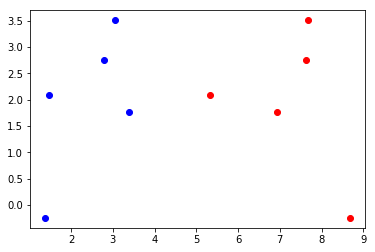

In [37]:
import numpy as np
import matplotlib.pyplot as plt

data=np.asarray(dataset)
#print(data.shape)

dataP=data[data[:,2]==1,0:2]
dataN=data[data[:,2]==0,0:2]
plt.plot(dataP[:,0],dataP[:,1],'or')
plt.plot(dataN[:,0],dataP[:,1],'ob')

## Learning weights, using SGD (Stochastic Gradient Descent)

SGD means that the optimization is conducted by taking one sample at a time. 

In [4]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]  # init weights are set to 0. 
	for epoch in range(n_epoch): # here, the number of epochs is set a priori. 
		sum_error = 0.0
		for row in train:  # .... for each observation, 
			prediction = predict(row, weights)
			error = row[-1] - prediction  # row[-1] refers to the last element in row (here, it is the label)
			sum_error += error**2
			weights[0] = weights[0] + l_rate * error  # l_rate = learing rate. 
			for i in range(len(row)-1):   # len(row)-1 is the number of inputs (including bias)
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return weights
 
# Calculate weights from this example dataset
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
l_rate = 0.1
n_epoch = 5
weights = train_weights(dataset, l_rate, n_epoch)
print(weights)

>epoch=0, lrate=0.100, error=2.000
>epoch=1, lrate=0.100, error=1.000
>epoch=2, lrate=0.100, error=0.000
>epoch=3, lrate=0.100, error=0.000
>epoch=4, lrate=0.100, error=0.000
[-0.1, 0.20653640140000007, -0.23418117710000003]


## SONAR DATA
This is a dataset that describes sonar chirp returns bouncing off different services. The 60 input variables are the strength of the returns at different angles. It is a binary classification problem that requires a model to differentiate rocks from metal cylinders.

It is a well-understood dataset. All of the variables are continuous and generally in the range of 0 to 1. As such we will not have to normalize the input data, which is often a good practice with the Perceptron algorithm. The output variable is a string “M” for mine and “R” for rock, which will need to be converted to integers 1 and 0.

By predicting the class with the most observations in the dataset (M or mines) the Zero Rule Algorithm can achieve an accuracy of 53%.

You can learn more about this dataset at the UCI Machine Learning repository. You can download the dataset for free and place it in your working directory with the filename sonar.all-data.csv.

## open a csv file and prepare data

In [5]:
from csv import reader
import numpy as np

# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

# load and prepare data
filename = 'sonar.all-data.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert string class to integers
str_column_to_int(dataset, len(dataset[0])-1)
print("size of sonar dataset = {}".format(np.asarray(dataset).shape))

size of sonar dataset = (208, 61)


## Visualize a few realizations

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 1st sample label = 1
 200st sample label = 0


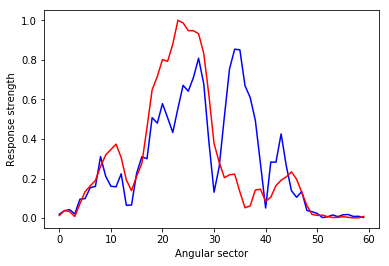

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

print(np.asarray(dataset)[:,-1])
plt.plot(np.asarray(dataset[0])[:-1],'b')
print(" 1st sample label = {}".format(dataset[0][-1]))
print(" 200st sample label = {}".format(dataset[200][-1]))
plt.plot(np.asarray(dataset[200])[:-1],'r')
plt.xlabel("Angular sector"); plt.ylabel("Response strength");

POstives
nb positive samples : (97, 61)
nb negative samples : (111, 61)


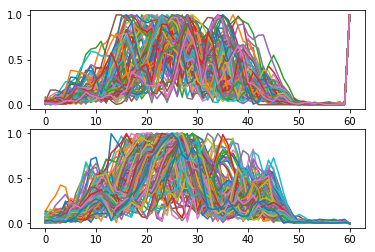

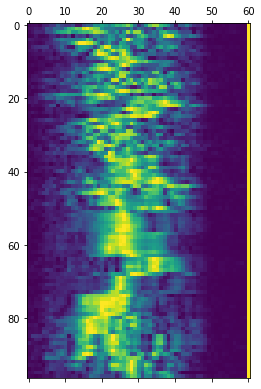

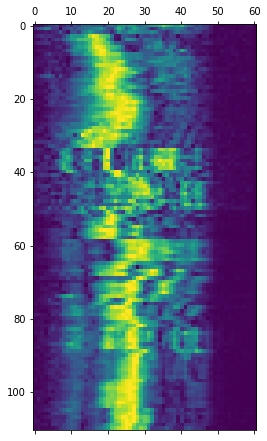

In [13]:
Positive=list()
Negative=list()
plt.figure(1)
for i in range(len(dataset)):
    r=dataset[i]; 
    if r[-1]== 1:
        Positive.append(r)
        plt.subplot(211)
        plt.plot(r)
    else: 
        Negative.append(r)
        plt.subplot(212)
        plt.plot(r)
        
plt.matshow(Positive)
print("nb positive samples :", np.asarray(Positive).shape)
plt.matshow(Negative)
print("nb negative samples :", np.asarray(Negative).shape)

## Build 2 sets : Training set and test set

In [12]:
plt.matshow?

In [39]:
import random 

random.shuffle(dataset)
test_size=int(len(dataset)*.40)
print("test_size = {}".format(test_size))
dataset_test = dataset[len(dataset)-test_size:]
dataset_train = dataset[0:len(dataset)-test_size]
print("nb_data_test = {0}, nb_data_train = {1}".format(len(dataset_test),len(dataset_train)))

test_size = 83
nb_data_test = 83, nb_data_train = 125


## Learn the perceptron from the training set

In [40]:
# Estimate Perceptron weights using stochastic gradient descent 
# Redefined (to cancel print output)
def train_weights(train, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
	return weights 

l_rate = 0.01
n_epoch = 500
weights = train_weights(dataset_train, l_rate, n_epoch)

# Result analysis
Now, let us compare the predicted values to the actual ones, for both the training set and the test set

In [41]:
prediction_train = list()
for row in dataset_train:
	prediction = predict(row, weights)
	prediction_train.append(prediction)

#print(prediction_train)
actual_value_train=np.asarray(dataset_train)[:,-1]
#print(actual_value_train)
#len(prediction_train)
#len(actual_value_train)

def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
Accuracy_train=accuracy_metric(actual_value_train,prediction_train)    
print('>>TRAINING SET : accuracy=%.3f%% from a set of nb=%i samples' % (Accuracy_train, len(prediction_train)))


prediction_test = list()
for row in dataset_test:
	prediction = predict(row, weights)
	prediction_test.append(prediction)

actual_value_test=np.asarray(dataset_test)[:,-1]

Accuracy_test=accuracy_metric(actual_value_test,prediction_test)    
print('>>Test SET : accuracy=%.3f%% from a set of nb=%i samples' % (Accuracy_test, len(prediction_test)))


>>TRAINING SET : accuracy=74.400% from a set of nb=125 samples
>>Test SET : accuracy=71.084% from a set of nb=83 samples


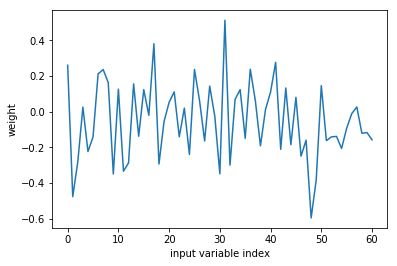

In [45]:
plt.figure(2)
plt.plot(weights);
plt.xlabel("input variable index");plt.ylabel('weight');

## Better solution : evaluate performances with k-folds cross-validation

In [12]:
from random import randrange
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()  # create an empty object of type list
	dataset_copy = list(dataset) # duplicate dataset, with type list
	fold_size = int(len(dataset) / n_folds) # floor of len(dataset)/n_folds
	for i in range(n_folds):     # for each fold
		fold = list() # create an empty object of type list
		while len(fold) < fold_size:  
			index = randrange(len(dataset_copy)) # draw an index at random among remaining samples
			fold.append(dataset_copy.pop(index)) # catenate to the current fold and cancel the current realization
		dataset_split.append(fold) #append the new fold to existing ones
	return dataset_split

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold) #last 2 lines : withdraw fold from data to build a training set
		train_set = sum(train_set, []) # reorganise the train set by catenating the content of the folds.
		test_set = list()  #use the remove fold as test_set
		for row in fold:
			row_copy = list(row)# make a copy, of type list.
			test_set.append(row_copy)
			row_copy[-1] = None #cancel label in test_set
		predicted = algorithm(train_set, test_set, *args)  #algorithm is any pediction function using *args as inputs params.
		actual = [row[-1] for row in fold] 
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Perceptron Algorithm With Stochastic Gradient Descent (usus predict function defined above)
def perceptron(train, test, l_rate, n_epoch):
	predictions = list()
	weights = train_weights(train, l_rate, n_epoch)
	for row in test:
		prediction = predict(row, weights)
		predictions.append(prediction)
	return(predictions)


In [13]:
# Test the Perceptron algorithm on the sonar dataset
from random import seed
seed(1)   # sets the seed of random generator to make the exp. reproducible
# evaluate algorithm
n_folds = 3
l_rate = 0.01
n_epoch = 500
scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [76.81159420289855, 72.46376811594203, 69.56521739130434]
Mean Accuracy: 72.947%
